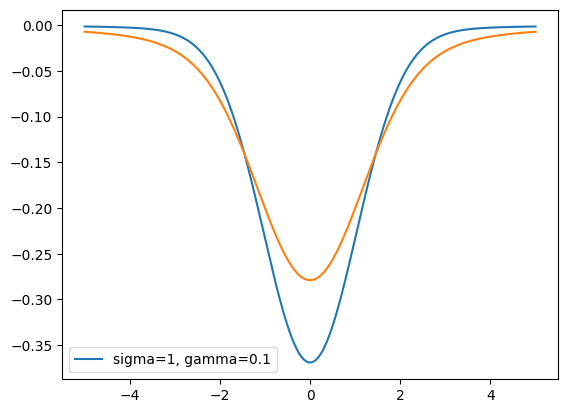

In [2]:
# Voigt abosorption profile

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz

def voigt(x, sigma, gamma):
    return np.real(wofz((x + 1j*gamma)/(np.sqrt(2)*sigma))) / (sigma*np.sqrt(2*np.pi))

x = np.linspace(-5, 5, 1000)
sigma = 1
gamma = 0.1
plt.plot(x, -voigt(x, sigma, gamma), label=f'sigma={sigma}, gamma={gamma}')
plt.plot(x, -voigt(x, 1.0, 0.5))
plt.legend()
plt.show()



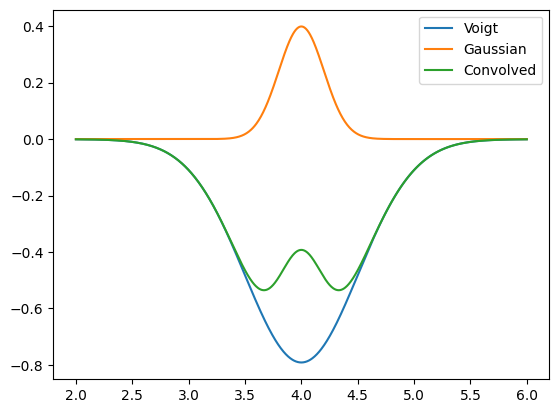

In [3]:
# Convolution of invertetd Voigt profile with Gaussian

def voigt(x, x0, sigma, gamma):
    return np.real(wofz(((x-x0) + 1j*gamma)/(np.sqrt(2)*sigma))) / (sigma*np.sqrt(2*np.pi))

def gaussian(x, mu, sigma):
    return np.exp(-0.5*((x - mu)/sigma)**2) / (sigma*np.sqrt(2*np.pi))


x = np.linspace(2, 6, 1000)
sigma_voigt = 0.5
gamma_voigt = 0.005
sigma_gaussian = 0.2
x0_gaussian = 4
mag_gaussian = 0.2
x0 = 4
voigt_profile = -voigt(x, x0, sigma_voigt, gamma_voigt)
gaussian_profile = mag_gaussian*gaussian(x, x0_gaussian, sigma_gaussian)
# convolved_profile = np.convolve(-voigt_profile, gaussian_profile, mode='same')
convolved_profile = voigt_profile + gaussian_profile


plt.plot(x, voigt_profile, label='Voigt')
plt.plot(x, gaussian_profile, label='Gaussian')
plt.plot(x, convolved_profile, label='Convolved')
plt.legend()
plt.show()



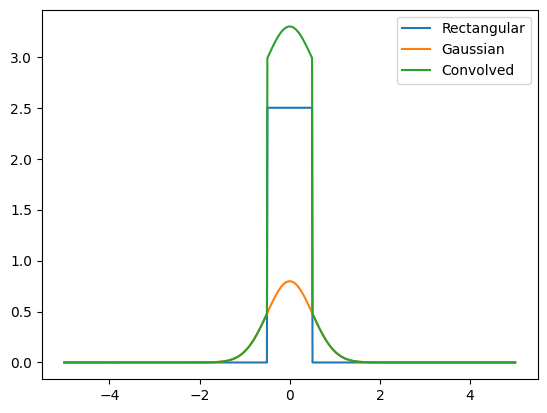

In [22]:
# Add rectangular function and Gaussian

def rect(x, a, x0, w):
    y = np.zeros_like(x)
    y[np.abs(x - x0) < w/2] = a
    return y
x = np.linspace(-5, 5, 1000)
x0 = 0
rect_profile = 5*rect(x, 0.5, x0, 1)
gaussian_profile = gaussian(x, x0, 0.5)
convolved_profile = gaussian_profile + rect_profile

plt.plot(x, rect_profile, label='Rectangular')
plt.plot(x, gaussian_profile, label='Gaussian')
plt.plot(x, convolved_profile, label='Convolved')
plt.legend()
plt.show()
